###### Import Statement

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.cluster import KMeans
from sklearn.tree import export_graphviz
from scipy import misc
%matplotlib inline

###### Preprocessing

In [102]:
#Reading dataset from the csv file
dataset=pd.read_csv('C:/Users/Petrofac/Desktop/Dissertation/glass.csv')
print(dataset.head())
print('\nThe shape of our dataset is:', dataset.shape)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

The shape of our dataset is: (214, 10)


In [103]:
#Randomozing the dataset rows
np.random.seed(1)
shuffled_index=np.random.permutation(dataset.index)
dataset=dataset.loc[shuffled_index]
print(dataset.head())

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
108  1.52222  14.43  0.00  1.00  72.67  0.10  11.52  0.00  0.08     2
206  1.51645  14.94  0.00  1.87  73.11  0.00   8.67  1.38  0.00     7
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24     2
51   1.51926  13.20  3.33  1.28  72.36  0.60   9.14  0.00  0.11     1


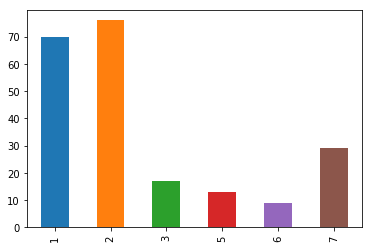

In [104]:
#NonUniform distribution of data
dataset['Type'].value_counts().sort_index().plot.bar()
plt.show()

In [105]:
# Labels are the values we want to predict
labels = np.array(dataset['Type'])
print(labels)

[2 7 2 2 1 1 1 3 1 1 2 1 2 1 3 2 2 2 3 1 1 7 2 1 3 1 2 2 1 1 5 6 1 1 1 1 3
 3 2 1 1 7 7 1 7 1 1 1 2 7 3 2 2 2 5 2 7 1 7 7 2 2 2 2 1 7 5 1 6 1 2 1 2 3
 2 2 1 1 1 7 7 1 5 1 7 2 1 2 2 2 2 6 7 1 6 2 7 3 5 3 2 7 7 1 7 2 7 7 1 2 2
 1 5 7 5 2 2 7 5 7 2 1 2 5 1 2 2 3 1 6 5 2 2 1 1 2 2 3 2 3 1 1 2 2 5 2 2 1
 2 1 6 2 5 2 2 7 1 1 1 6 2 2 1 1 2 1 1 1 6 1 3 2 7 1 2 5 2 7 1 1 2 1 1 1 1
 1 1 7 2 2 2 1 1 2 3 3 2 3 2 1 6 1 2 2 2 2 7 2 2 7 2 2 2 1]


In [106]:
#Convert dataset into taarget and attribute set
# axis 1 refers to the columns
dataset_data= dataset.drop('Type', axis = 1)
print(dataset_data.head())
dataset_target=dataset['Type']
print(dataset_target.head())
feature_list=dataset_data.columns
print(feature_list)

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
108  1.52222  14.43  0.00  1.00  72.67  0.10  11.52  0.00  0.08
206  1.51645  14.94  0.00  1.87  73.11  0.00   8.67  1.38  0.00
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24
51   1.51926  13.20  3.33  1.28  72.36  0.60   9.14  0.00  0.11
108    2
206    7
106    2
107    2
51     1
Name: Type, dtype: int64
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')


In [107]:
#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(dataset_data, dataset_target, test_size=0.25, random_state=1)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

          RI     Na    Mg    Al     Si     K    Ca   Ba    Fe
149  1.51643  12.16  3.52  1.35  72.89  0.57  8.53  0.0  0.00
98   1.51689  12.67  2.88  1.71  73.21  0.73  8.54  0.0  0.00
79   1.51590  12.82  3.52  1.90  72.86  0.69  7.97  0.0  0.00
56   1.51215  12.99  3.47  1.12  72.98  0.62  8.35  0.0  0.31
63   1.52227  14.17  3.81  0.78  71.35  0.00  9.69  0.0  0.00
          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe
45   1.51900  13.49  3.48  1.35  71.95  0.55  9.00  0.00  0.00
192  1.51623  14.20  0.00  2.79  73.46  0.04  9.04  0.40  0.09
205  1.51732  14.95  0.00  1.80  72.99  0.00  8.61  1.55  0.00
191  1.51602  14.85  0.00  2.38  73.28  0.00  8.76  0.64  0.09
78   1.51613  13.92  3.52  1.25  72.88  0.37  7.94  0.00  0.14
149    3
98     2
79     2
56     1
63     1
Name: Type, dtype: int64
45     1
192    7
205    7
191    7
78     2
Name: Type, dtype: int64


###### Random Forest from sklearn 

In [108]:
#Creating random forest object and training the forest with the training data
objRandom=RandomForestClassifier(n_estimators=500,random_state=1)
objRandom.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [109]:
#Accuracy of the original random forest from sklearn
#
#

###### Pruning Random Forest from skLearn

In [110]:
#Decision trees in the random forest
print(objRandom.estimators_)

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1791095845, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=2135392491, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_le

C:\Users\Petrofac\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


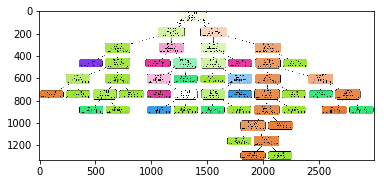

In [111]:
# Acessing a tree from random forest classifier
randomForestTree1 = objRandom.estimators_[0]
# Export the image to a dot file
export_graphviz(randomForestTree1, out_file = 'tree.dot', feature_names = feature_list, filled=True, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png');
file = misc.imread('tree.png')
plt.imshow(file)

In [112]:
listColumn=[]
instanceNumbr ='inst'
for inst in range(len(X_train)):
    columnHeader=instanceNumbr+str(inst+1)
    listColumn.append(columnHeader)

listlabel=[]
decisionTree ='DTree'
for header in range(objRandom.n_estimators):
    rowHeader=decisionTree+str(header)
    listlabel.append(rowHeader)

listPredict=[]
for estimators in objRandom.estimators_:
    estimators.classes_=objRandom.classes_
    predictions=estimators.predict(X_train)
    listPredict.append(predictions)
    #print(predictions)
    #print(estimators)
    
#print(listColumn)
#print(listlabel)
#print(listPredict)
#tListPredict=np.transpose(listPredict)
#print(tListPredict)

df1 = pd.DataFrame(listPredict,columns=listColumn)
df2 = pd.DataFrame(listlabel)
clusterSet=pd.concat([df2,df1],axis=1)
# tc = np.transpose(clusterSet)
# pd.concat([df2,df1],axis=1)
# print(tc.head())
# tc1= tc.drop(0, axis = 1)
# print(clusterSet)
# print(listPredict)

In [113]:
print(df1.head())

   inst1  inst2  inst3  inst4  inst5  inst6  inst7  inst8  inst9  inst10  \
0      3      5      2      6      1      5      5      3      2       7   
1      3      2      2      2      1      5      5      1      2       7   
2      3      1      2      2      1      5      5      1      2       7   
3      3      2      2      1      1      6      5      3      2       7   
4      3      2      2      1      3      2      5      3      2       7   

    ...     inst151  inst152  inst153  inst154  inst155  inst156  inst157  \
0   ...           2        5        1        7        1        3        3   
1   ...           6        5        1        7        1        2        2   
2   ...           6        5        1        7        1        1        3   
3   ...           6        5        1        7        1        2        3   
4   ...           6        5        1        7        1        2        3   

   inst158  inst159  inst160  
0        2        1        3  
1        2        

In [116]:
def get_distance(tree_One,tree_Two):
    diff=0
    dimension=len(tree_One)
    for inst in range(dimension):
        if(tree_One[inst]==tree_Two[inst]):
            diff=diff
        else:
            diff=diff+1  
            
    diff=int(round(diff))        
    return diff

In [117]:
# Create an Object for outlier detection
localoutlier = LocalOutlierFactor(n_neighbors=20,metric=get_distance, contamination=0.1)
outlier = localoutlier.fit_predict(df1)        

In [118]:
outlier

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [137]:
df1['Outlier']=outlier
index=df1[df1['Outlier']==-1].index
print(len(index))

50


In [138]:
estimator_array=[]
for i in range(len(index)):
    estimator_array.append(objRandom.estimators_[i])    

In [139]:
new_rfObject=RandomForestClassifier(n_estimators=len(index))
new_rfObject.classes_=objRandom.classes_
new_rfObject.estimators_=estimator_array
new_rfObject.n_classes_=objRandom.n_classes_
new_rfObject.n_outputs_=objRandom.n_outputs_


In [142]:
objRandom.score(X_test,y_test)

0.7777777777777778

In [143]:
new_rfObject.score(X_test,y_test)

0.7407407407407407